In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [2]:
df_1 = pd.read_csv("real_electronic_sim/real_electronic_sim_1.txt", sep="	")
df_1

,time,V(input),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,5.000000e-09,0.000000e+00,0.000000e+00
1,1.541014e-08,0.000004,5.000000e-09,4.857107e-11,-1.480695e-08
2,1.542691e-08,0.000017,5.000000e-09,-2.282113e-08,4.066854e-09
3,1.544369e-08,0.000033,5.000000e-09,-2.212556e-08,-2.229564e-07
4,1.546047e-08,0.000054,5.000000e-09,2.135273e-09,-6.958768e-07
...,...,...,...,...,...
293196,3.237803e-05,0.000033,5.000000e-09,-1.048708e-06,-3.305053e-04
293197,3.240977e-05,0.000033,5.000000e-09,-8.473339e-07,-3.305053e-04
293198,3.244151e-05,0.000033,5.000000e-09,-2.372922e-07,-3.305053e-04
293199,3.247325e-05,0.000033,5.000000e-09,1.399959e-07,-3.305053e-04


(3.0000000000000004e-05, 3.2000000000000005e-05)

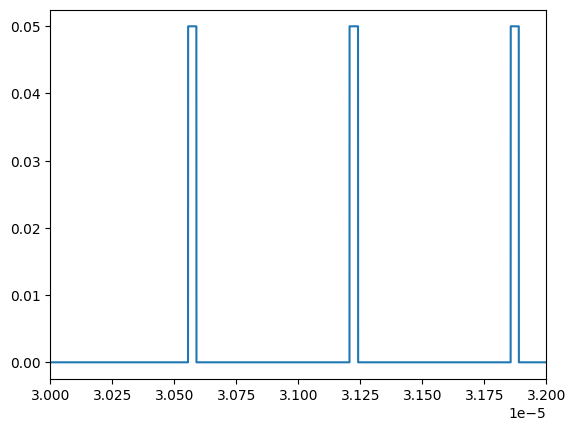

In [3]:
plt.plot(df_1["time"],df_1["V(out)"])
plt.xlim(3*10**-5,3.2*10**-5)

In [4]:
pulse_widths_1 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_1.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_1['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_1['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_1.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_1 = pd.DataFrame(np.floor(pulse_widths_1), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_1)

    Pulse Width (divided by 3.125 ns)
0                                 3.0
1                                 5.0
2                                 6.0
3                                 6.0
4                                 7.0
5                                 7.0
6                                 8.0
7                                 8.0
8                                 8.0
9                                 8.0
10                                8.0
11                                8.0
12                                9.0
13                                9.0
14                                9.0
15                                9.0
16                               10.0
17                                9.0
18                                9.0
19                                9.0
20                                9.0
21                                9.0
22                                9.0
23                                9.0
24                               10.0
25          

In [5]:
df_2 = pd.read_csv("real_electronic_sim/real_electronic_sim_2.txt", sep="	")
print(df_2)

pulse_widths_2 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_2.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_2['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_2['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_2.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_2 = pd.DataFrame(np.floor(pulse_widths_2), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_2)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       1.155885e-08  0.000007  5.000000e-09  8.153555e-11  -2.485621e-08
2       1.158129e-08  0.000039  5.000000e-09 -7.455855e-08  -2.403760e-07
3       1.160373e-08  0.000073  5.000000e-09 -6.343114e-08  -9.277190e-07
4       1.162616e-08  0.000107  5.000000e-09  3.346377e-08  -2.086885e-06
...              ...       ...           ...           ...            ...
292313  3.233390e-05  0.000040  5.000000e-09 -1.607079e-07  -4.015962e-04
292314  3.237017e-05  0.000040  5.000000e-09  1.316940e-08  -4.016000e-04
292315  3.240644e-05  0.000040  5.000000e-09  2.859344e-07  -4.016103e-04
292316  3.246992e-05  0.000040  5.000000e-09  1.083944e-07  -4.016103e-04
292317  3.250000e-05  0.000040  5.000000e-09  2.686692e-07  -4.016103e-04

[292318 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 3.0
1        

In [6]:
df_3 = pd.read_csv("real_electronic_sim/real_electronic_sim_3.txt", sep="	")
print(df_3)

pulse_widths_3 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_3.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_3['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_3['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_3.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_3 = pd.DataFrame(np.floor(pulse_widths_3), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_3)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       3.956319e-09  0.000008  5.000000e-09  1.004880e-10  -3.063388e-08
2       3.987386e-09  0.000062  5.000000e-09 -2.379840e-07  -6.995921e-07
3       4.018454e-09  0.000114  5.000000e-09 -1.930390e-07  -2.225796e-06
4       4.049521e-09  0.000163  5.000000e-09  1.349354e-07  -4.609245e-06
...              ...       ...           ...           ...            ...
294486  3.230941e-05  0.000041  5.000000e-09 -5.848963e-07  -4.049974e-04
294487  3.234115e-05  0.000041  5.000000e-09 -4.239271e-07  -4.050018e-04
294488  3.237288e-05  0.000041  5.000000e-09 -5.435021e-08  -4.050141e-04
294489  3.249984e-05  0.000041  5.000000e-09 -2.218136e-07  -4.050141e-04
294490  3.250000e-05  0.000041  5.000000e-09 -2.278726e-07  -4.050141e-04

[294491 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 2.0
1        

In [7]:
df_4 = pd.read_csv("real_electronic_sim/real_electronic_sim_4.txt", sep="	")
print(df_4)

pulse_widths_4 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_4.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_4['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_4['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_4.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_4 = pd.DataFrame(np.floor(pulse_widths_4), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_4)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       8.452818e-09  0.000008  5.000000e-09  2.197866e-09  -1.120280e-07
2       8.491745e-09  0.000088  5.000000e-09 -5.120378e-07  -1.519432e-06
3       8.530672e-09  0.000163  5.000000e-09 -3.578984e-07  -4.338550e-06
4       8.569599e-09  0.000233  5.000000e-09  4.646160e-07  -8.569380e-06
...              ...       ...           ...           ...            ...
294360  3.209298e-05  0.000034  5.000000e-09 -1.522782e-04  -3.466863e-04
294361  3.212472e-05  0.000034  5.000000e-09 -6.359929e-06  -3.416093e-04
294362  3.221993e-05  0.000034  5.000000e-09  3.998943e-06  -3.406775e-04
294363  3.247384e-05  0.000034  5.000000e-09  1.427463e-07  -3.406774e-04
294364  3.250000e-05  0.000034  5.000000e-09  2.247449e-07  -3.406774e-04

[294365 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 1.0
1        

In [8]:
df_5 = pd.read_csv("real_electronic_sim/real_electronic_sim_5.txt", sep="	")
print(df_5)

pulse_widths_5 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_5.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_5['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_5['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_5.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_5 = pd.DataFrame(np.floor(pulse_widths_5), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_5)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       2.054685e-09  0.000008  5.000000e-09  4.785247e-10  -4.123565e-08
2       2.104130e-09  0.000097  5.000000e-09 -8.922713e-07  -2.117903e-06
3       2.153575e-09  0.000178  5.000000e-09 -5.736104e-07  -6.036826e-06
4       2.203020e-09  0.000252  5.000000e-09  9.564612e-07  -1.179800e-05
...              ...       ...           ...           ...            ...
293439  3.208914e-05  0.000038  5.000000e-09 -2.027938e-04  -3.928886e-04
293440  3.212088e-05  0.000038  5.000000e-09 -1.557481e-05  -3.860520e-04
293441  3.215261e-05  0.000038  5.000000e-09  6.377812e-07  -3.847576e-04
293442  3.247000e-05  0.000038  5.000000e-09  1.078303e-07  -3.846908e-04
293443  3.250000e-05  0.000038  5.000000e-09  2.750943e-07  -3.846908e-04

[293444 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 2.0
1        

In [9]:
df_6 = pd.read_csv("real_electronic_sim/real_electronic_sim_6.txt", sep="	")
print(df_6)

pulse_widths_6 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_6.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_6['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_6['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_6.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_6 = pd.DataFrame(np.floor(pulse_widths_6), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_6)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       4.316439e-09  0.000006  5.000000e-09  3.645481e-10  -4.128232e-08
2       4.355452e-09  0.000029  5.000000e-09  7.922454e-09  -3.688346e-07
3       4.401753e-09  0.000118  5.000000e-09 -7.572621e-07  -2.822126e-06
4       4.448054e-09  0.000200  5.000000e-09 -3.596816e-07  -7.051125e-06
...              ...       ...           ...           ...            ...
294799  3.212201e-05  0.000039  5.000000e-09 -1.194462e-05  -3.895487e-04
294800  3.221722e-05  0.000039  5.000000e-09  4.305144e-06  -3.883394e-04
294801  3.228070e-05  0.000039  5.000000e-09 -7.925342e-07  -3.883393e-04
294802  3.247113e-05  0.000039  5.000000e-09  1.244510e-07  -3.883393e-04
294803  3.250000e-05  0.000039  5.000000e-09  2.607159e-07  -3.883393e-04

[294804 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 5.0
1        

In [10]:
df_7 = pd.read_csv("real_electronic_sim/real_electronic_sim_7.txt", sep="	")
print(df_7)

pulse_widths_7 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_7.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_7['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_7['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_7.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_7 = pd.DataFrame(np.floor(pulse_widths_7), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_7)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       1.730577e-08  0.000005  5.000000e-09  1.278407e-09  -6.516200e-08
2       1.735035e-08  0.000089  5.000000e-09 -6.987805e-07  -1.725254e-06
3       1.739494e-08  0.000167  5.000000e-09 -4.796204e-07  -5.023096e-06
4       1.743953e-08  0.000239  5.000000e-09  6.587588e-07  -9.958689e-06
...              ...       ...           ...           ...            ...
293252  3.231272e-05  0.000038  5.000000e-09  1.121131e-06  -3.779819e-04
293253  3.234446e-05  0.000038  5.000000e-09 -7.320498e-07  -3.781618e-04
293254  3.240794e-05  0.000038  5.000000e-09  2.477977e-07  -3.781618e-04
293255  3.247141e-05  0.000038  5.000000e-09  1.269077e-07  -3.781618e-04
293256  3.250000e-05  0.000038  5.000000e-09  2.527702e-07  -3.781618e-04

[293257 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 3.0
1        

In [11]:
# Read and process all dataframes
dfs = []
for i in range(1, 15):
    df = pd.read_csv(f"real_electronic_sim/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

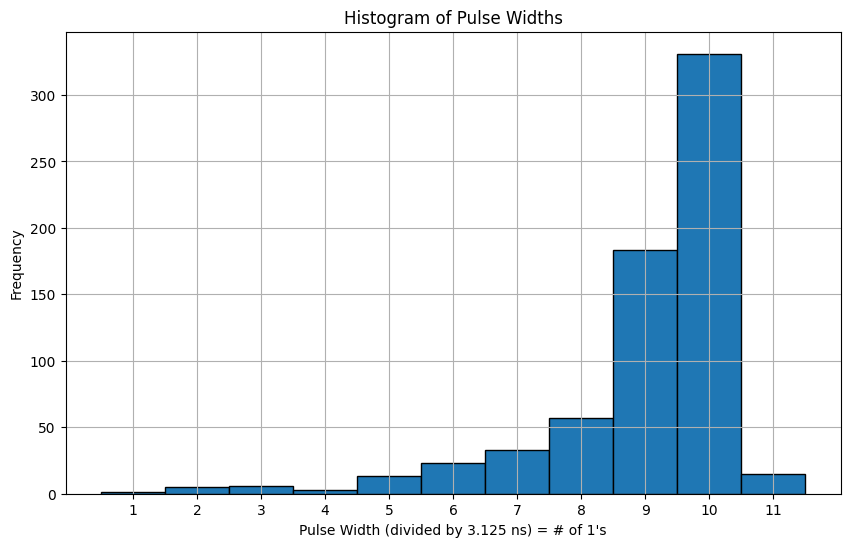

In [12]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

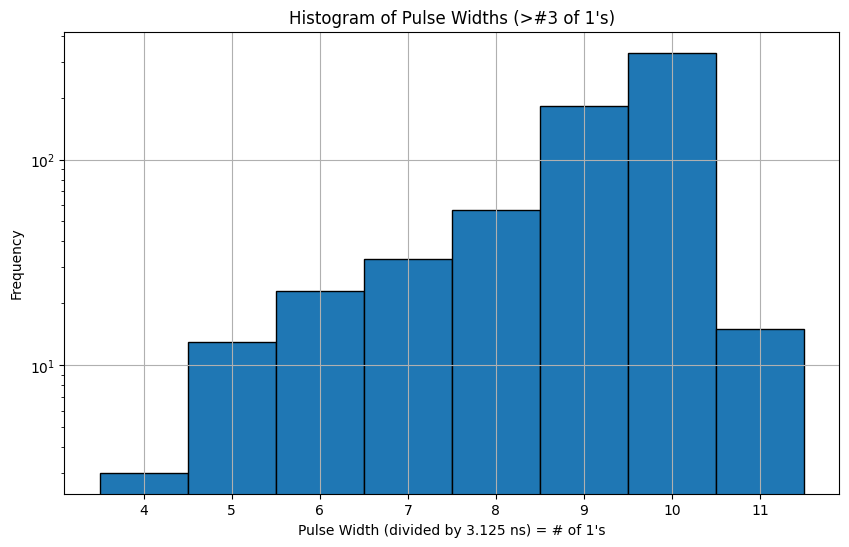

In [13]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [14]:
df_tau_10_1 = pd.read_csv("real_electronic_sim_tau_10/real_electronic_sim_1.txt", sep="	")
print(df_tau_10_1)

pulse_widths_tau_10_1 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_tau_10_1.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_tau_10_1['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_tau_10_1['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_tau_10_1.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_tau_10_1 = pd.DataFrame(np.floor(pulse_widths_tau_10_1), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_tau_10_1)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       9.818273e-09  0.000007  5.000000e-09  4.382766e-10  -4.963152e-08
2       9.857286e-09  0.000032  5.000000e-09  9.507938e-09  -4.356355e-07
3       9.915591e-09  0.000128  5.000000e-09 -1.227778e-06  -3.976895e-06
4       9.973896e-09  0.000215  5.000000e-09 -4.381881e-07  -9.757647e-06
...              ...       ...           ...           ...            ...
307924  3.210294e-05  0.000060  5.000000e-09 -1.221032e-04  -6.058399e-04
307925  3.213467e-05  0.000060  5.000000e-09 -1.077858e-06  -6.007060e-04
307926  3.222989e-05  0.000060  5.000000e-09  2.320774e-06  -5.999979e-04
307927  3.248380e-05  0.000060  5.000000e-09  1.022367e-07  -5.999978e-04
307928  3.250000e-05  0.000060  5.000000e-09 -3.622813e-07  -5.999978e-04

[307929 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 6.0
1        

In [15]:
# Read and process all dataframes
dfs = []
for i in range(1, 16):
    df = pd.read_csv(f"real_electronic_sim_tau_10/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

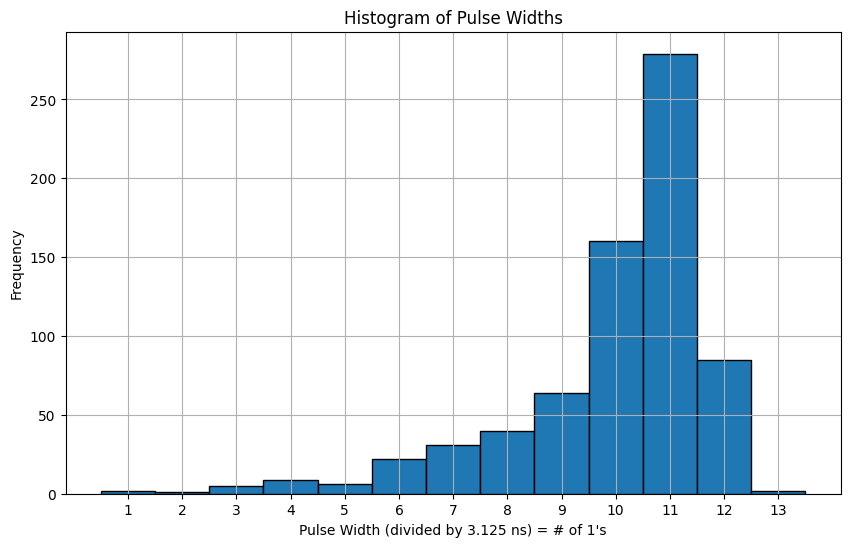

In [16]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

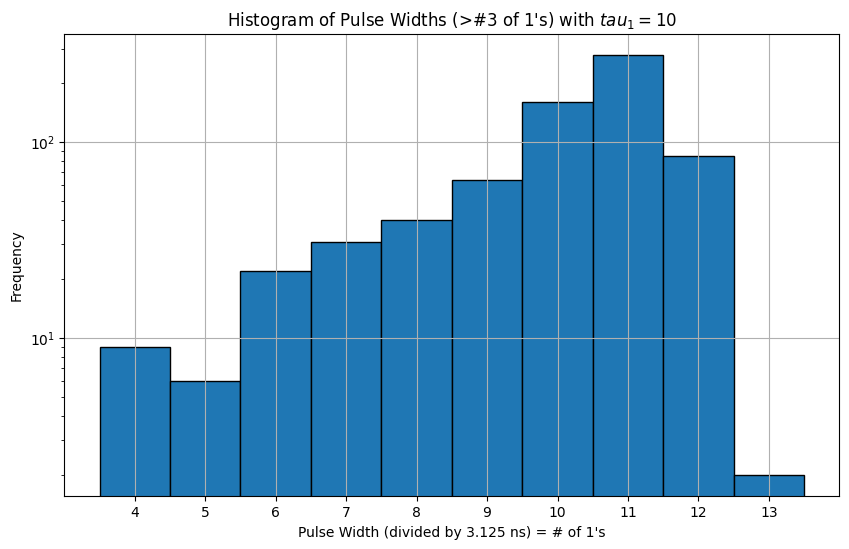

In [17]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with $tau_{1} = 10$')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [4]:
# Read and process all dataframes
dfs = []
for i in range(1, 11):
    df = pd.read_csv(f"C:/Users/Usuario/OneDrive/Desktop/ITeDA/Hist Presentacion/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

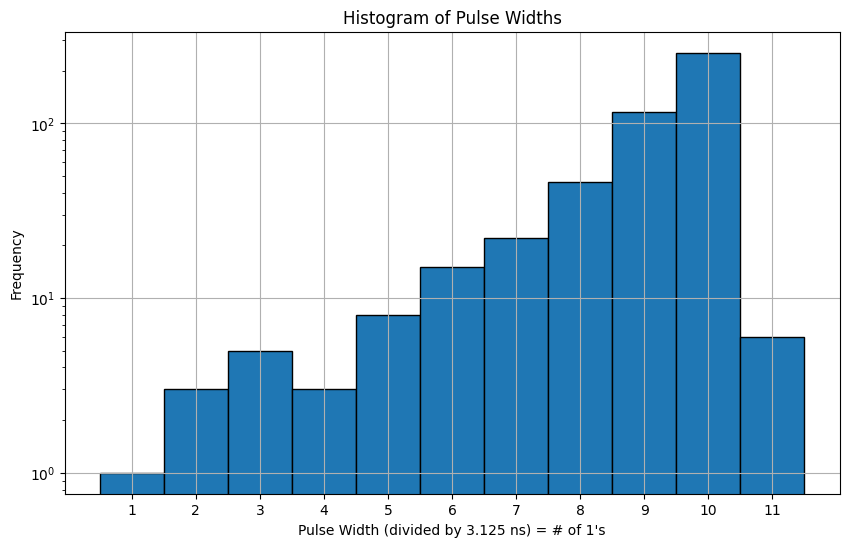

Mean (valor medio): 9.05020920502092
Standard Deviation (sigma): 1.545124867966667


In [5]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

# Calculate mean and standard deviation
mean_value = all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


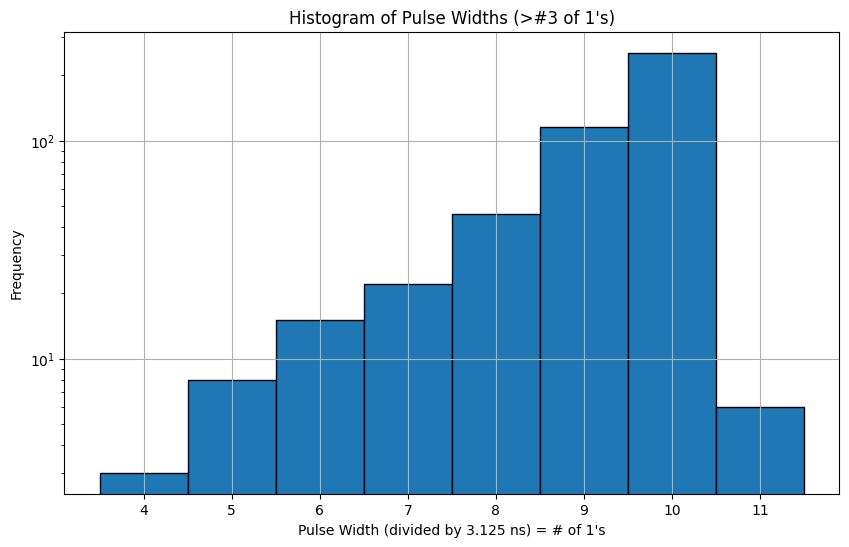

In [6]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.savefig('hist_presenta.png', dpi=1000)

In [7]:
import numpy as np

# Calculate mean and standard deviation
mean_value = filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].mean()
std_dev_value = filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].std()

print(f"Mean (valor medio): {mean_value}")
print(f"Standard Deviation (sigma): {std_dev_value}")


Mean (valor medio): 9.176972281449894
Standard Deviation (sigma): 1.2526137635692143


# ANALISIS DE DATOS DE LA MOTIVACION (PROBLEMAS!!!!!!!!)

## Datos Reales

In [47]:
# Load the data, skipping bad lines and handling non-numeric data
data_real = pd.read_csv(
    'C:/Users/Usuario/OneDrive/Desktop/ITeDA/6-ones_norm_sec_theta_all_data.dat', 
    sep=' ', 
    header=None, 
    skiprows=1,  # Skip the first row if it’s not data
    names=['ones', 'ones_normalized', 'sec_theta'],
    dtype=str,  # Read everything as strings initially to inspect
    on_bad_lines='skip'  # Skip lines with errors
)

# Convert columns to numeric, forcing errors to NaN
data_real['ones'] = pd.to_numeric(data_real['ones'], errors='coerce')

print(data_real['ones'])

# Print the unique values in the 'ones' column
unique_values_real = data_real['ones'].unique()
print("Unique values in the 'ones' column:", unique_values_real)

0           8
1           7
2           6
3           8
4           7
           ..
5226891     7
5226892     8
5226893    11
5226894    11
5226895     7
Name: ones, Length: 5226896, dtype: int64
Unique values in the 'ones' column: [   8    7    6    9   11   10    5    4   14   12   13   15   17   18
  116   16   19   21   68   69   75   70   71   74   24   72   73   67
   57   32   44   26   27   20   56   36   35   29   51   42   43   66
   59   63   64   52   60   55   54  515  261   30   61   65 1537   40
   38   39   37 1026 1142 1526   48   33   34   28 1029 1027   49   58
   31   46   45   77  517  259 1532   47   41   50   23   76   22   62
   25 1333]


In [48]:
# Print the unique values in the 'ones' column, sorted in ascending order
unique_values_sorted_real = np.sort(unique_values_real)
print("Sorted unique values in the 'ones' column:", unique_values_sorted_real)


Sorted unique values in the 'ones' column: [   4    5    6    7    8    9   10   11   12   13   14   15   16   17
   18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   68   69   70   71   72   73   74
   75   76   77  116  259  261  515  517 1026 1027 1029 1142 1333 1526
 1532 1537]


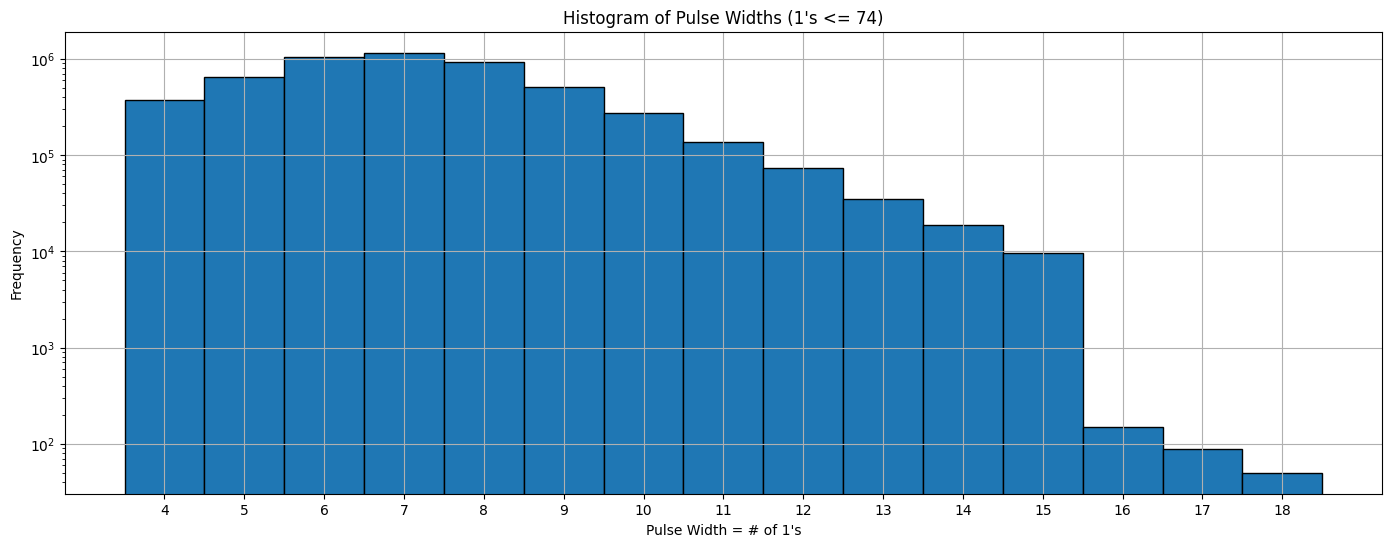

In [57]:
# Filter the data to keep only values <= 74
filtered_data_real = data_real[(data_real['ones'] > 3) & (data_real['ones'] <= 18)]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(17, 6))

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_real['ones'], bins=bin_edges_real, edgecolor='black', log=True)

# Customize the plot
plt.title('Histogram of Pulse Widths (1\'s <= 74)')
plt.xlabel('Pulse Width = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 1))

# Save and show the plot
plt.savefig('hist_presenta.png', dpi=1000)
plt.show()


## Datos Simluados

In [54]:
# Load the data, skipping bad lines and handling non-numeric data
data_sim = pd.read_csv(
    'C:/Users/Usuario/OneDrive/Desktop/ITeDA/6-ones_norm_sec_theta_all_sim.dat', 
    sep=' ', 
    header=None, 
    skiprows=1,  # Skip the first row if it’s not data
    names=['ones', 'ones_normalized', 'sec_theta'],
    dtype=str,  # Read everything as strings initially to inspect
    on_bad_lines='skip'  # Skip lines with errors
)

# Convert columns to numeric, forcing errors to NaN
data_sim['ones'] = pd.to_numeric(data_sim['ones'], errors='coerce')

print(data_sim['ones'])

# Print the unique values in the 'ones' column
unique_values_sim = data_sim['ones'].unique()
print("Unique values in the 'ones' column:", unique_values_sim)

0           8
1           9
2           9
3           6
4           7
           ..
1593620     8
1593621     7
1593622     8
1593623    11
1593624     7
Name: ones, Length: 1593625, dtype: int64
Unique values in the 'ones' column: [ 8  9  6  7  5 11 10  4 13 14 12 15 16 18 17]


In [55]:
# Print the unique values in the 'ones' column, sorted in ascending order
unique_values_sorted_sim = np.sort(unique_values_sim)
print("Sorted unique values in the 'ones' column:", unique_values_sorted_sim)


Sorted unique values in the 'ones' column: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


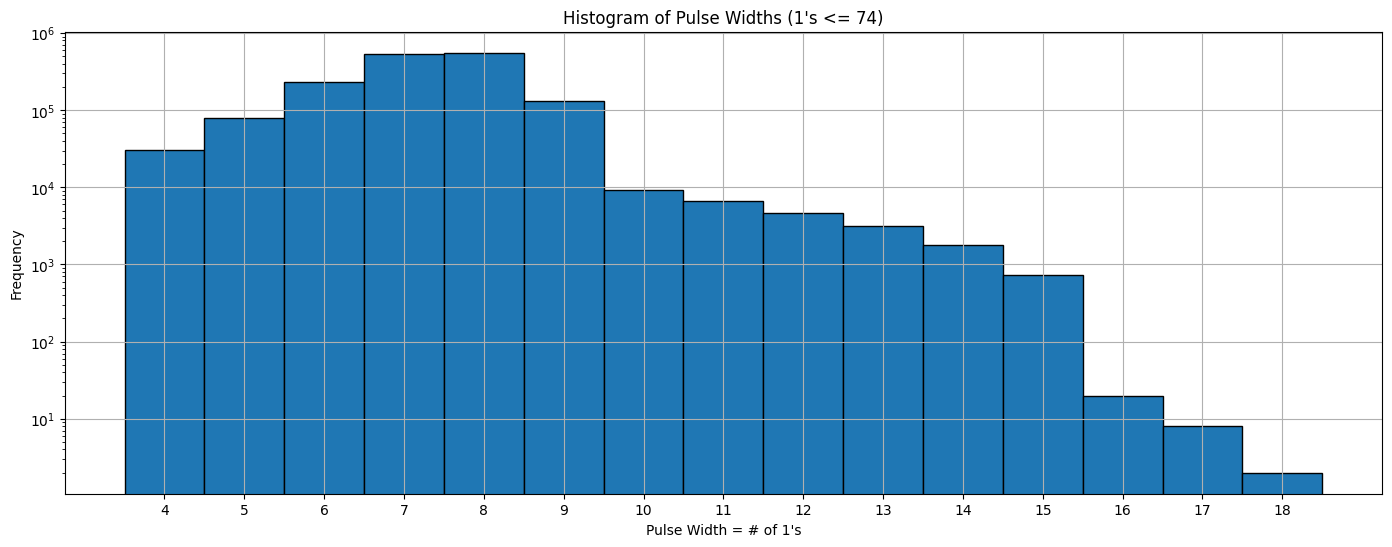

In [72]:
# Filter the data to keep only values <= 74
filtered_data_sim = data_sim[(data_sim['ones'] > 3) & (data_sim['ones'] <= 74)]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(17, 6))

# Define the bin edges for the histogram
bin_edges_sim = np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_sim['ones'], bins=bin_edges_sim, edgecolor='black', log=True)

# Customize the plot
plt.title('Histogram of Pulse Widths (1\'s <= 74)')
plt.xlabel('Pulse Width = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 1))

# Save and show the plot
plt.savefig('hist_presenta.png', dpi=1000)
plt.show()


## Datos uno arriba de otro

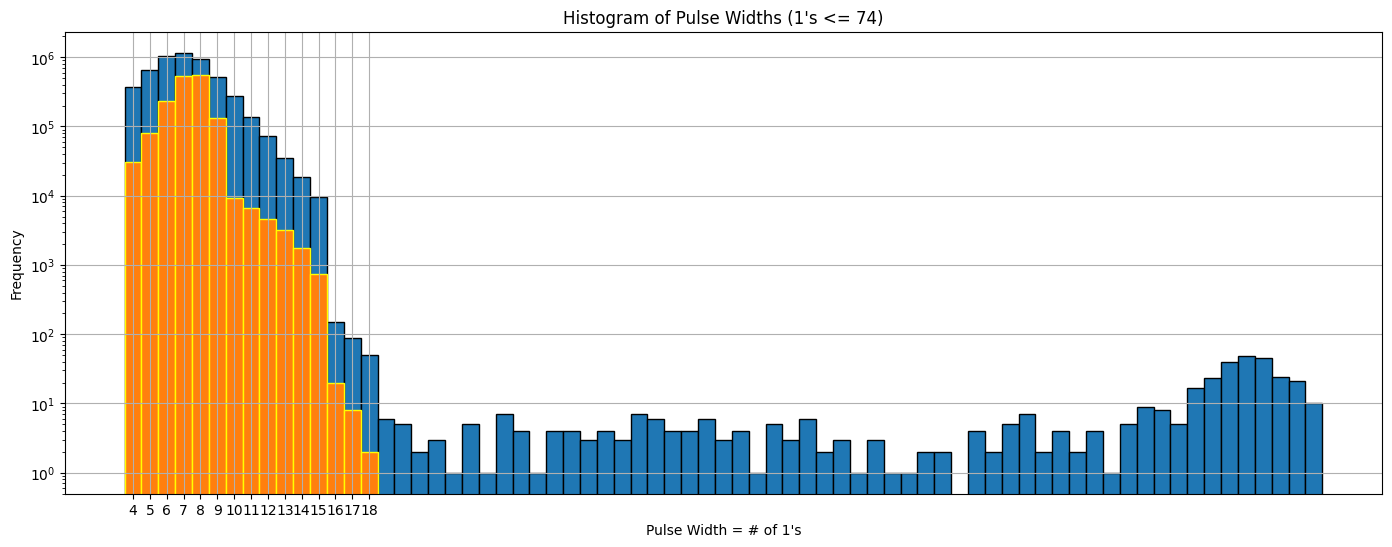

In [73]:
# Filter the data to keep only values <= 74
filtered_data_real = data_real[(data_real['ones'] > 3) & (data_real['ones'] <= 74)]

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5



# Filter the data to keep only values <= 74
filtered_data_sim = data_sim[(data_sim['ones'] > 3) & (data_sim['ones'] <= 74)]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(17, 6))

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_real['ones'], bins=bin_edges_real, edgecolor='black', log=True, label='real')

# Define the bin edges for the histogram
bin_edges_sim = np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_sim['ones'], bins=bin_edges_sim, edgecolor='yellow', log=True, label='sim')

# Customize the plot
plt.title('Histogram of Pulse Widths (1\'s <= 74)')
plt.xlabel('Pulse Width = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 1))

# Save and show the plot
plt.savefig('hist_presenta.png', dpi=1000)
plt.show()


## Datos uno arriba de otro normalizando por la cantidad de entradas

In [70]:
# Triplicate the data by concatenating the DataFrame with itself twice
triplicated_data = pd.concat([data_sim] * 3, ignore_index=True)

# Display the triplicated DataFrame
print(triplicated_data)

         ones     ones_normalized           sec_theta
0           8  1.0947404183497103                 1.0
1           9  1.2315829706434238                 1.0
2           9  1.2315829706434238                 1.0
3           6  0.8210553137622826                 1.0
4           7  0.9578978660559964                 1.0
...       ...                 ...                 ...
4780870     8   1.098845762549099  1.1791784033620965
4780871     7  0.9614900422304616  1.7882916499714008
4780872     8   1.098845762549099  1.7882916499714008
4780873    11  1.5109129235050112  1.7882916499714008
4780874     7  0.9614900422304616  1.7882916499714008

[4780875 rows x 3 columns]


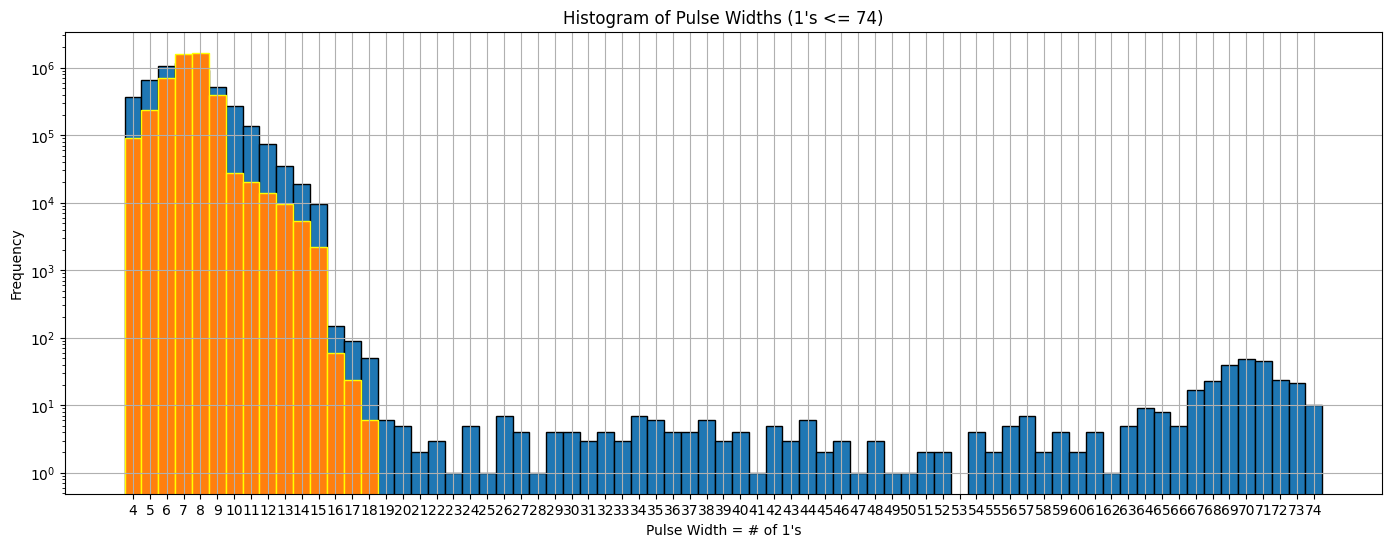

In [71]:
# Filter the data to keep only values <= 74
filtered_data_real = data_real[(data_real['ones'] > 3) & (data_real['ones'] <= 74)]

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5



# Filter the data to keep only values <= 74
filtered_data_sim = triplicated_data[(triplicated_data['ones'] > 3) & (triplicated_data['ones'] <= 74)]

# Now you can proceed with the histogram plotting
plt.figure(figsize=(17, 6))

# Define the bin edges for the histogram
bin_edges_real = np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_real['ones'], bins=bin_edges_real, edgecolor='black', log=True, label='real')

# Define the bin edges for the histogram
bin_edges_sim = np.arange(np.min(filtered_data_sim['ones']), np.max(filtered_data_sim['ones']) + 2) - 0.5

# Plot the histogram
plt.hist(filtered_data_sim['ones'], bins=bin_edges_sim, edgecolor='yellow', log=True, label='sim')

# Customize the plot
plt.title('Histogram of Pulse Widths (1\'s <= 74)')
plt.xlabel('Pulse Width = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_data_real['ones']), np.max(filtered_data_real['ones']) + 1))

# Save and show the plot
plt.savefig('hist_presenta.png', dpi=1000)
plt.show()
